In [354]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [355]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn as sns
import tensorflow as tf

In [356]:
import data_visualisation as dv
import data_preprocessing as dp

In [357]:
os.chdir(r'C:\Users\nikitamarc.pomies\Desktop\KaggleChallenge')
print(os.getcwd())

C:\Users\nikitamarc.pomies\Desktop\KaggleChallenge


In [358]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [359]:
df=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')

# Dataset view

In [360]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

**Delete duplicates and Check for unique values in each features**

In [362]:
dp.check_duplicates(df)

 Number of duplicates rows : 0, (0.0%)


In [363]:
df.nunique().sort_values(ascending=True)

failure               2
attribute_0           2
attribute_1           3
attribute_2           4
attribute_3           4
product_code          5
measurement_2        25
measurement_0        29
measurement_1        30
measurement_5      4671
measurement_4      4692
measurement_6      4704
measurement_9      4708
measurement_8      4713
measurement_3      4721
measurement_7      4734
measurement_13     5271
measurement_10     6177
measurement_14     6389
measurement_12     6392
measurement_11     6526
measurement_15     6577
measurement_16     7035
loading           11950
measurement_17    23612
id                26570
dtype: int64

In [364]:
test["product_code"].value_counts()

F    5422
I    5228
G    5107
H    5018
Name: product_code, dtype: int64

**Checking for missing values for each features**



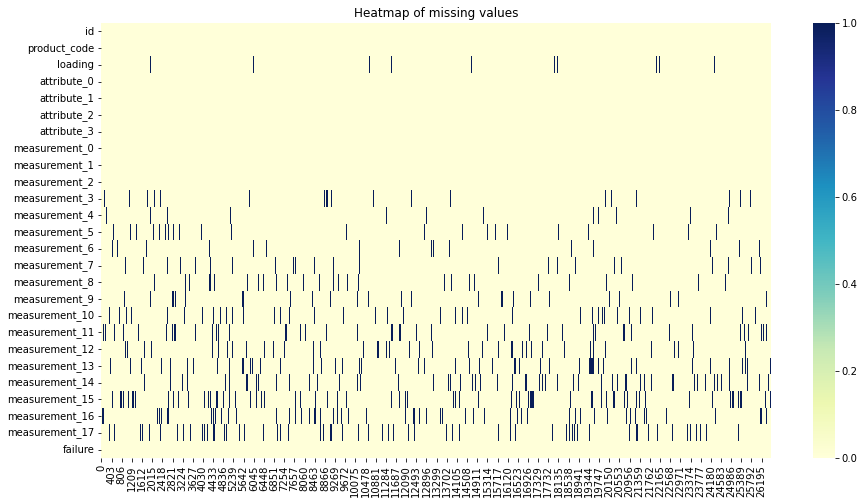

In [365]:
dv.heatmap_missing_values(df)

In [366]:
df.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

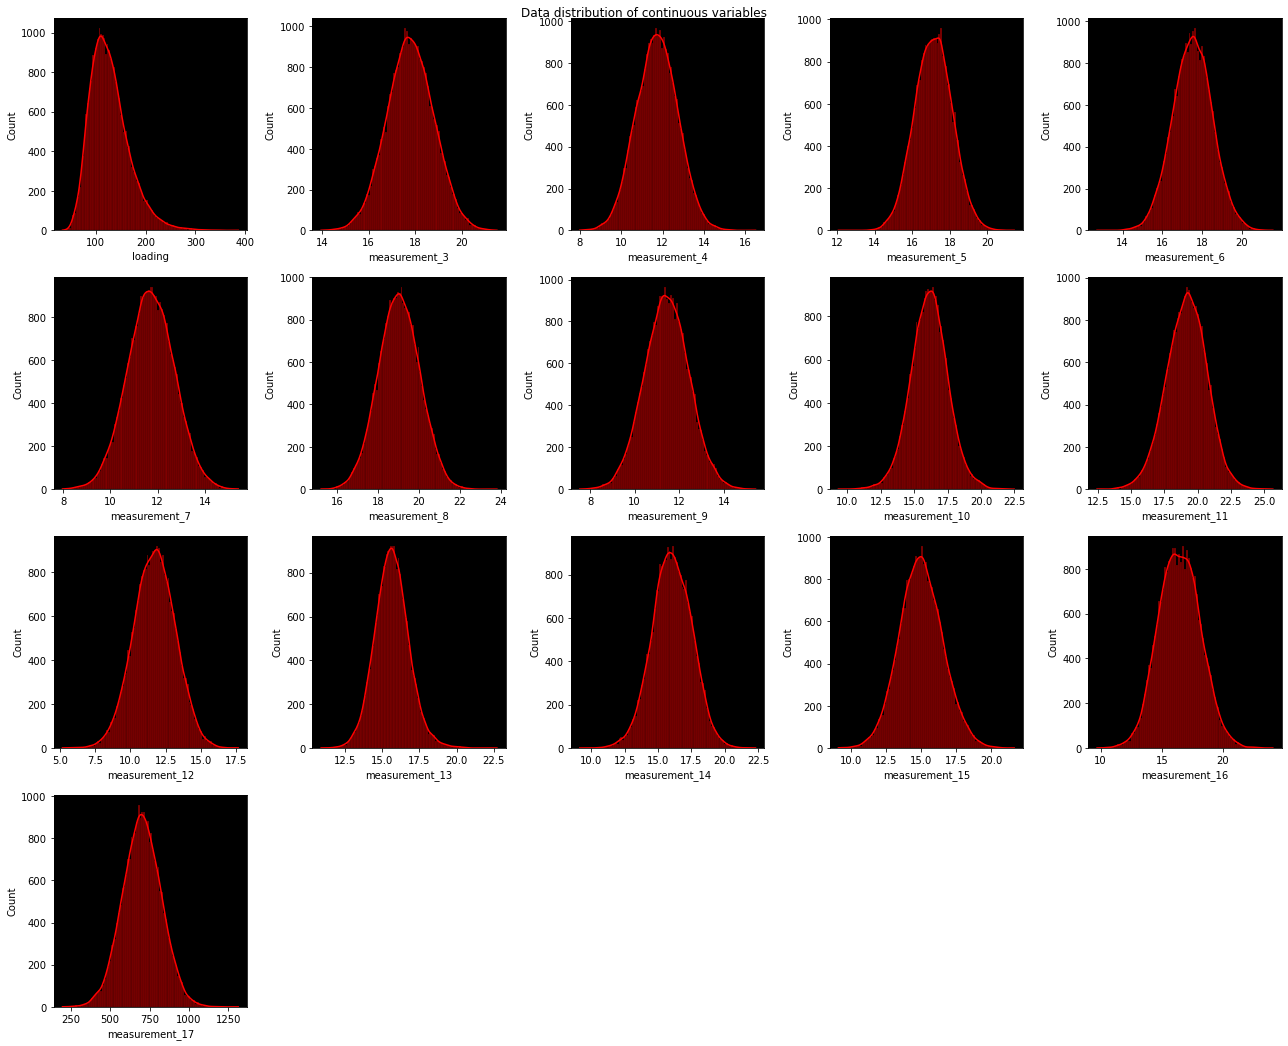

In [367]:
dv.check_data_distribution(df)

Text(0.5, 1.0, 'Correlations')

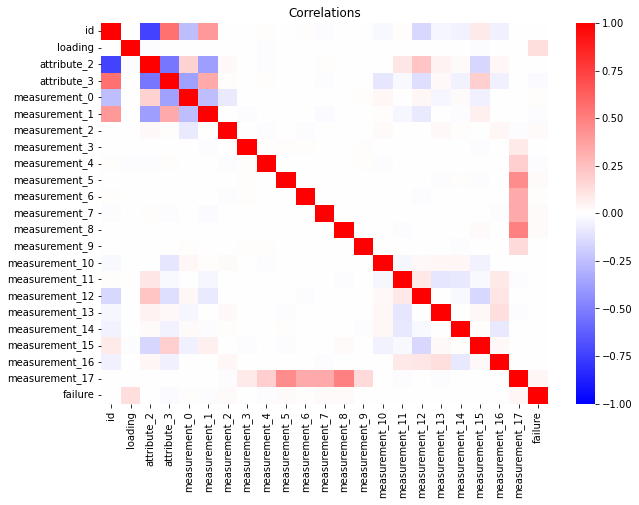

In [368]:
# Heatmap of correlations
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='bwr', vmin=-1, vmax=1)
plt.title('Correlations')

In [369]:
dfgrp = df.groupby('product_code').mean().T
testgrp = test.groupby('product_code').mean().T

data=pd.concat([dfgrp,testgrp], axis = 1 ).corr(method = 'kendall')


In [370]:
data[data == 1 ] = -1
data


product_code,A,B,C,D,E,F,G,H,I
product_code,,,,,,,,,
A,-1.000000,0.926734,0.897233,0.934655,0.897233,0.896104,0.948052,0.930736,0.913420
B,0.926734,-1.000000,0.926734,0.928571,0.974259,0.885035,0.954449,0.928419,0.971803
C,0.897233,0.926734,-1.000000,0.966339,0.952569,0.904762,0.904762,0.939394,0.904762
D,0.934655,0.928571,0.966339,-1.000000,0.950497,0.928419,0.928419,0.937095,0.928419
E,0.897233,0.974259,0.952569,0.950497,-1.000000,0.870130,0.939394,0.956710,0.956710
F,0.896104,0.885035,0.904762,0.928419,0.870130,-1.000000,0.896104,0.861472,0.896104
G,0.948052,0.954449,0.904762,0.928419,0.939394,0.896104,-1.000000,0.948052,0.948052
H,0.930736,0.928419,0.939394,0.937095,0.956710,0.861472,0.948052,-1.000000,0.913420
I,0.913420,0.971803,0.904762,0.928419,0.956710,0.896104,0.948052,0.913420,-1.000000


In [371]:
test['product_code'].value_counts()

F    5422
I    5228
G    5107
H    5018
Name: product_code, dtype: int64

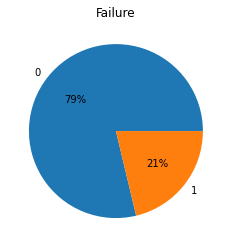

In [372]:
target_var=pd.crosstab(index=df['failure'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Failure')
plt.show()

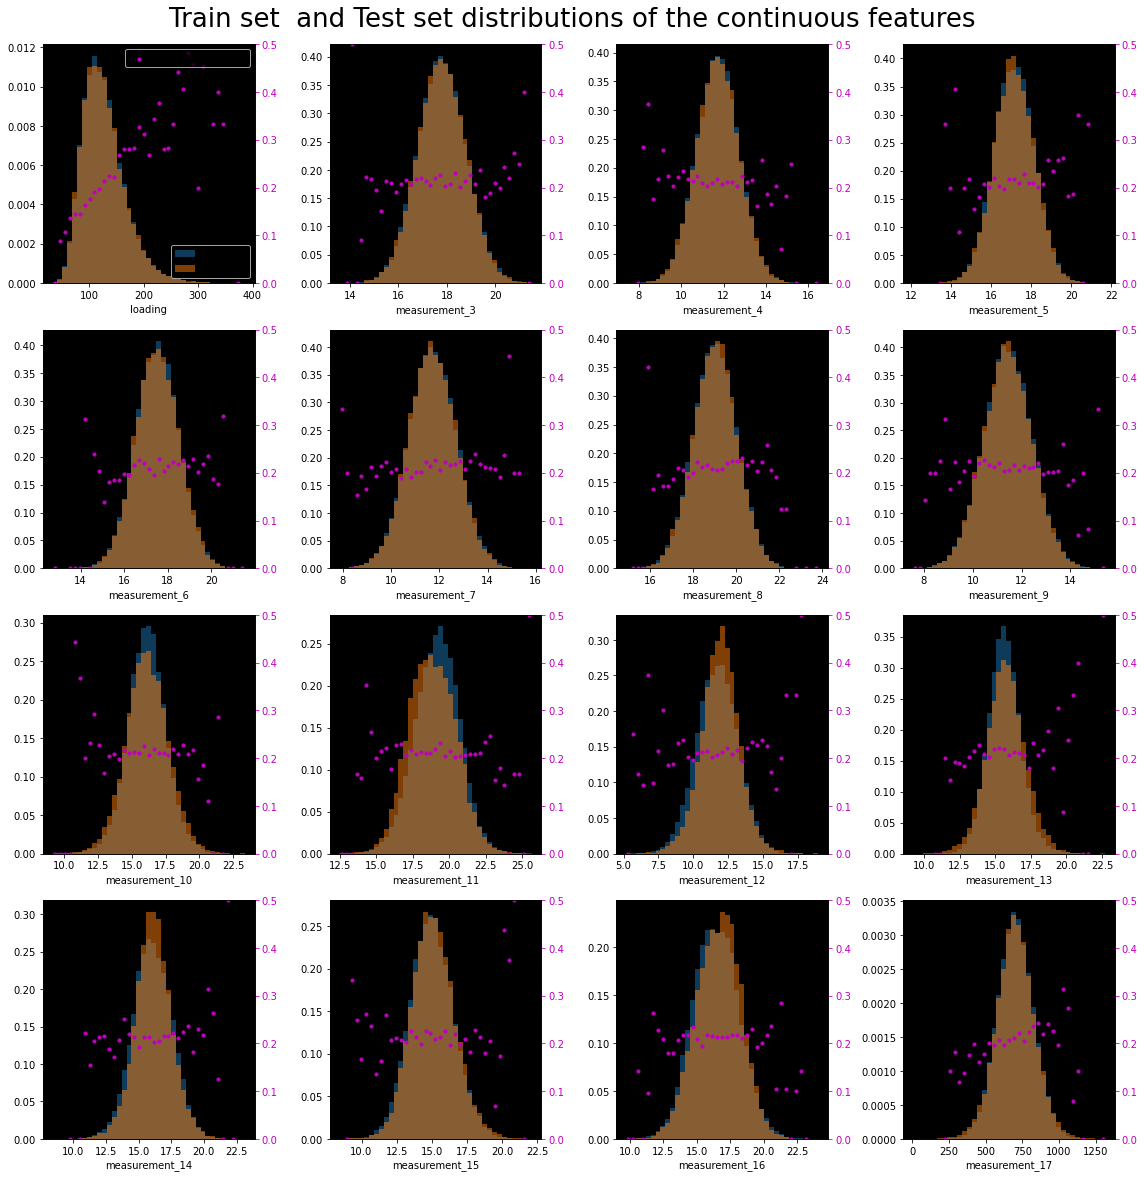

In [373]:
dv.visualize_test_train_distrib(df,test)

**Features Cleaning**

We remove the categorical features where the test and train dataset have different unique values.

In [374]:
limit = 20 # Anything with more than 50 unique values is considered a numerical feature.
cat_feat = [feat for feat in df.columns if df[feat].nunique() < limit and feat!= 'failure' and feat!= "attribute_2" and feat!="attribute_3" ]#and feat !="product_code"]
num_feat = [feat for feat in df.columns if feat not in cat_feat and feat!= 'failure']

dp.remove_unusable_features(df,test,cat_feat)

cat. features product_code takes different values in train and test set 
  -> product_code deleted 

['A' 'B' 'C' 'D' 'E'] ['F' 'G' 'H' 'I'] 

cat. features attribute_1 takes different values in train and test set 
  -> attribute_1 deleted 

['material_8' 'material_5' 'material_6'] ['material_6' 'material_7' 'material_5'] 



In [375]:


#Both the dataset have same unique values in each column.we will encode this feature as a binary valuable
df['attribute_0']=df['attribute_0'].map({'material_7':0,'material_5':1})
test['attribute_0']=test['attribute_0'].map({'material_7':0,'material_5':1})

**Modelling**

In [376]:
df['measurement_avg'] = df[[f'measurement_{i}' for i in range(3, 17)]].mean(axis=1)
test['measurement_avg'] = test[[f'measurement_{i}' for i in range(3, 17)]].mean(axis=1)

df['m3_missing'] = df['measurement_3'].isnull().astype(np.int8)
df['m5_missing'] = df['measurement_5'].isnull().astype(np.int8)

test['m3_missing'] = test['measurement_3'].isnull().astype(np.int8)
test['m5_missing'] = test['measurement_5'].isnull().astype(np.int8)


meas_gr1_cols = [f"measurement_{i:d}" for i in list(range(3, 5)) + list(range(9, 17))]
#df['meas_gr1_avg'] = np.mean(data[meas_gr1_cols], axis=1)
#df['meas_gr1_std'] = np.std(data[meas_gr1_cols], axis=1)
meas_gr2_cols = [f"measurement_{i:d}" for i in list(range(5, 9))]
df['meas_gr2_avg'] = np.mean(df[meas_gr2_cols], axis=1)
test['meas_gr2_avg'] = np.mean(test[meas_gr2_cols], axis=1)

df['attribute_2*3'] = df['attribute_2'] * df['attribute_3']
test['attribute_2*3'] = test['attribute_2'] * test['attribute_3']



df.head()

,id,loading,attribute_0,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,measurement_avg,m3_missing,m5_missing,meas_gr2_avg,attribute_2*3
0,0,80.10,0,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0,15.350538,0,0,16.73350,45
1,1,84.89,0,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0,15.446286,0,0,16.56175,45
2,2,82.43,0,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0,15.784231,0,0,16.49600,45
3,3,101.07,0,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0,15.599500,0,0,17.13950,45
4,4,188.06,0,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0,15.194071,0,0,15.53375,45


In [377]:
# One-hot encoding
encoded_columns = [] #['product_code']
for col in encoded_columns:
     temp_df= pd.get_dummies(test[col], prefix = col)
     
     test = pd.merge(left = test, right = temp_df, left_index = True, right_index = True)
test = test.drop(encoded_columns, axis = 1)


In [378]:
test.head()

,id,loading,attribute_0,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,measurement_avg,m3_missing,m5_missing,meas_gr2_avg,attribute_2*3
0,26570,119.57,1,6,4,6,9,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612,15.423286,0,0,16.48850,24
1,26571,113.51,1,6,4,11,8,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037,15.013462,0,0,15.95200,24
2,26572,112.16,1,6,4,8,12,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995,15.259429,0,0,16.17700,24
3,26573,112.72,1,6,4,8,11,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301,14.892357,0,0,16.03425,24
4,26574,208.00,1,6,4,14,16,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044,15.430714,0,0,16.51600,24


In [379]:
X_train=df[df.columns.difference(["failure",'id',"attribute_2","attribute_3"])]


X_test = test[test.columns.difference(['id', "attribute_2","attribute_3"])]

y_train = df["failure"]

X_train.head()
X_test.head()

,attribute_0,attribute_2*3,loading,m3_missing,m5_missing,meas_gr2_avg,measurement_0,measurement_1,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_avg
0,1,24,119.57,0,0,16.48850,6,9,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.423286
1,1,24,113.51,0,0,15.95200,11,8,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,15.013462
2,1,24,112.16,0,0,16.17700,8,12,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,15.259429
3,1,24,112.72,0,0,16.03425,8,11,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,14.892357
4,1,24,208.00,0,0,16.51600,14,16,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,15.430714


In [380]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer


knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
iterative_imputer = IterativeImputer(max_iter = 8, random_state = 0, skip_complete = True, n_nearest_features = 12)

#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_train= knn_imputer.fit_transform(X_train)
#X_test=knn_imputer.transform(X_test)
X_train= iterative_imputer.fit_transform(X_train)
X_test=iterative_imputer.transform(X_test)

#Scaling data
#scaler =StandardScaler()
#X_train = scaler.fit_transform(X_train
#X_test = scaler.fit_transform(X_test)





C:\Users\nikitamarc.pomies\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Epoch 1/100
665/665 [==============================] - 1s 1ms/step - loss: 0.7091 - accuracy: 0.7389 - val_loss: 0.5537 - val_accuracy: 0.7928
Epoch 2/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5760 - accuracy: 0.7580 - val_loss: 0.5216 - val_accuracy: 0.7926
Epoch 3/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7795 - val_loss: 0.5601 - val_accuracy: 0.7928
Epoch 4/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7834 - val_loss: 0.5042 - val_accuracy: 0.7928
Epoch 5/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5244 - accuracy: 0.7847 - val_loss: 0.5045 - val_accuracy: 0.7928
Epoch 6/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5165 - accuracy: 0.7859 - val_loss: 0.5047 - val_accuracy: 0.7928
Epoch 7/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5168 - accuracy: 0.7856 - val_loss: 0.5055 - val_accuracy: 0.7928

Epoch 58/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5124 - accuracy: 0.7858 - val_loss: 0.5038 - val_accuracy: 0.7930
Epoch 59/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5140 - accuracy: 0.7858 - val_loss: 0.5028 - val_accuracy: 0.7926
Epoch 60/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5133 - accuracy: 0.7857 - val_loss: 0.5046 - val_accuracy: 0.7930
Epoch 61/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7853 - val_loss: 0.5072 - val_accuracy: 0.7919
Epoch 62/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5129 - accuracy: 0.7856 - val_loss: 0.5032 - val_accuracy: 0.7928
Epoch 63/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7859 - val_loss: 0.5046 - val_accuracy: 0.7926
Epoch 64/100
665/665 [==============================] - 1s 1ms/step - loss: 0.5117 - accuracy: 0.7858 - val_loss: 0.5069 - val_accuracy:

TypeError: float() argument must be a string or a number, not 'History'

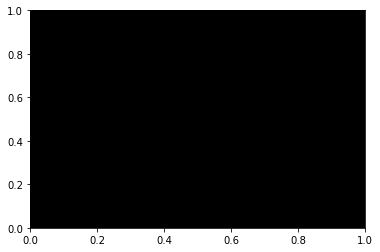

In [389]:
number_of_features = X_train.shape[1]
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6,input_dim = number_of_features))
model.add(tf.keras.layers.LeakyReLU(alpha=0.06))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2)


In [384]:
y_pred=model.predict(X_test)

650/650 [==============================] - 0s 706us/step


In [385]:
from sklearn.metrics import roc_auc_score
y_test = model.predict(X_train)
print(roc_auc_score(y_train,y_test))

831/831 [==============================] - 1s 688us/step
0.5927109747144187


In [386]:
sub=pd.read_csv('input/sample_submission.csv')

In [387]:
sub['failure']=y_pred

In [388]:
sub.to_csv('submissions/first_submission.csv',index=False)